# **Dependencies**

In [1]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

import cv2
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Original Data: https://www.kaggle.com/datasets/msambare/fer2013/data

In [ ]:
!unzip /content/FER-2013-Full.zip

# **Data**

In [3]:
Classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

##**XY Dataset Creations**

In [4]:
# Initialize lists for training, validation, and testing data
training_data = []
validation_data = []
testing_data = []

# Directory paths
train_directory = "/content/train"
test_directory = "/content/test"

validation_bool = True

# Function to create data
def create_data(directory):
    for category in Classes:
        path = os.path.join(directory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path)


                if validation_bool:
                  # Assign to validation or test set based on file name
                  if "PrivateTest" in img:
                      validation_data.append([img_array, class_num])
                  elif "PublicTest" in img:
                      testing_data.append([img_array, class_num])
                  else:
                      training_data.append([img_array, class_num])

                # No validation set
                else:
                  if "PrivateTest" in img or "PublicTest" in img:
                    testing_data.append([img_array, class_num])
                  else:
                    training_data.append([img_array, class_num])
            except Exception as e:
                pass

In [5]:
# Create training data
create_data(train_directory)

# Process test data (splitting into validation and test sets)
create_data(test_directory)

# Convert to numpy arrays for easier processing
X_train = np.array([item[0] for item in training_data]) / 255.0
Y_train = np.array([item[1] for item in training_data])

if validation_bool:
  X_val = np.array([item[0] for item in validation_data]) / 255.0
  Y_val = np.array([item[1] for item in validation_data])

X_test = np.array([item[0] for item in testing_data]) / 255.0
Y_test = np.array([item[1] for item in testing_data])

In [6]:
print(len(X_train))
print(len(Y_train))
if validation_bool:
  print(len(X_val))
  print(len(Y_val))
print(len(X_test))
print(len(Y_test))
X_train[0].shape

28709
28709
3589
3589
3589
3589


(48, 48, 3)

# **Sequential Model**

In [14]:
model = Sequential()

# Layer 1
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu',
                        input_shape=(48, 48, 3), data_format='channels_last',
                        kernel_regularizer=l2(0.01)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.4))

# Layer 2
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.4))

# Layer 3
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

# Layer 4
model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

# Flatten the layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#**Train + Test XY**

In [ ]:
history = model.fit(X_train, Y_train, epochs=30, shuffle=True)

In [16]:
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_val, Y_val), shuffle=True)

Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 40ms/step - accuracy: 0.1936 - loss: 2.4805 - val_accuracy: 0.2382 - val_loss: 1.8611
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 64s 30ms/step - accuracy: 0.2502 - loss: 1.8576 - val_accuracy: 0.2388 - val_loss: 1.8212
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.2458 - loss: 1.8301 - val_accuracy: 0.2449 - val_loss: 1.8103
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.2540 - loss: 1.8079 - val_accuracy: 0.2474 - val_loss: 1.7657
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.2732 - loss: 1.7690 - val_accuracy: 0.2823 - val_loss: 1.7543
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.3135 - loss: 1.7029 - val_accuracy: 0.2870 - val_loss: 1.7352
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.3613 - loss: 1.6097 - val_accuracy: 0.2466 - val_loss: 1.7924
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.3796 - loss: 1.5662 - 

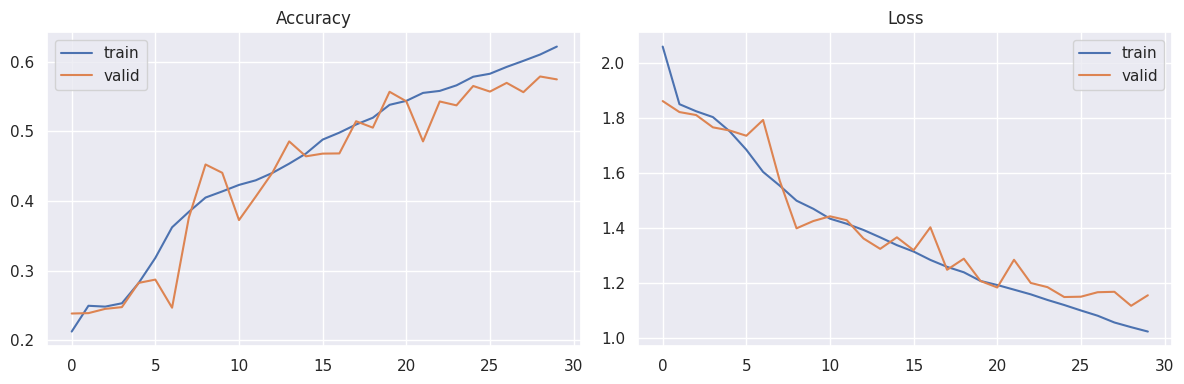

In [17]:
sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
plt.title('Loss')
plt.tight_layout()

plt.savefig('epoch_history_dcnn.png')
plt.show()

###**Testing**

In [18]:
model.evaluate(X_test, Y_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4926 - loss: 1.4027


[1.2264288663864136, 0.5792700052261353]

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


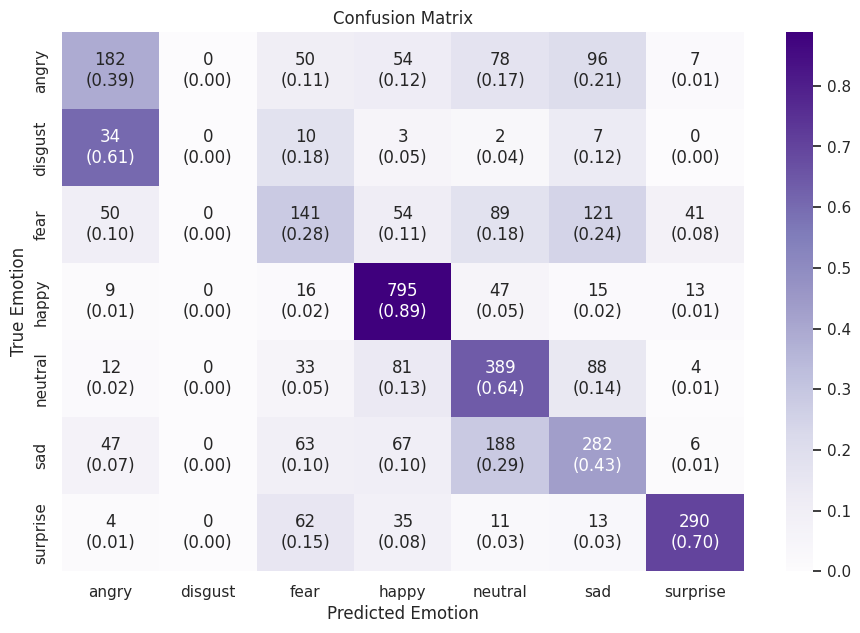

In [19]:
y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred.argmax(axis=1))
cm_prob = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

annotations = np.array([[f"{int(cm[i, j])}\n({cm_prob[i, j]:.2f})" for j in range(cm.shape[1])] for i in range(cm.shape[0])])

plt.figure(figsize=(11,7))
sns.heatmap(cm_prob, annot=annotations, fmt='', cmap='Purples', xticklabels=Classes, yticklabels=Classes)
plt.xlabel('Predicted Emotion')
plt.ylabel('True Emotion')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(np.bincount(Y_test))

[ 958  111 1024 1774 1233 1247  831]


#**Save Model**

In [20]:
model.save('seqfermodel3.h5')

In [21]:
model = keras.models.load_model('seqfermodel3.h5')

#**Notes**

Sequential Model Run with All Categories.

*   Training Data Accuracy: 94%+
*   Test Data Accuracy: 60%
*   Training Data Size: 28709
*   Test Data Size: 7178

Key notes:
* Additional training data DID improve model performance. When we switched from the modified dataset to the original, test data performance improved.

* Image fidelity may play a role, where nuances in expression may not be detectible in a small image space of 48x48. Larger images require significantly more compute time on GPUs and it is always a balance

* Images with similar emotion visualizations (Sad, Angry, and Fearful all may have a frowning aspect) do have low test accuracy. This points to the challenges in categorizing nuanced differences, while highlighting the relatively strong performance of categorizing emotions that are more visually distinct (Happy/Sad)

* The "Truthfulness" of the images should be considered, and data labeling biases may exist. What may be considered Neutral to some may look Angry to others.
